In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	14559362.1164

Best Fitness:	1882917.4378
Solution:	100.0000
Diff:		1882817.4378

[0:00:44][----------] 1.96% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	18411320.7091

Best Fitness:	3092110.0997
Solution:	100.0000
Diff:		3092010.0997

[0:01:16][----------] 3.92% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	15733859.9449

Best Fitness:	1675723.3656
Solution:	100.0000
Diff:		1675623.3656

[0:01:51][#---------] 5.88% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	18388734.1367

Best Fitness:	2748027.7517
Solution:	100.0000
Diff:		2747927.7517

[0:02:23][#---------] 7.84% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	21439875.8612

Best Fitness:	2354062.6197
Solution:	100.0000
Diff:		2353962.6197

[0:02:54][#---------] 9.80% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	24644747.8088

Best Fitness:	1178223.1049
Solution:	100.0000
Diff:		1178123.1049

[0:03:24][#---------] 11.76% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	16013438.4579

Best Fitness:	2075797.9911
Solution:	100.0000
Diff:		2075697.9911

[0:03:55][#---------] 13.73% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	16218396.0439

Best Fitness:	889954.4162
Solution:	100.0000
Diff:		889854.4162

[0:04:26][##--------] 15.69% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	18222830.3363

Best Fitness:	2266048.4224
Solution:	100.0000
Diff:		2265948.4224

[0:04:57][##--------] 17.65% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	38066549.6450

Best Fitness:	3448850.4919
Solution:	100.0000
Diff:		3448750.4919

[0:05:27][##--------] 19.61% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	14034908.8661

Best Fitness:	662696.6581
Solution:	100.0000
Diff:		662596.6581

[0:05:58][##--------] 21.57% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	22179198.4154

Best Fitness:	3177480.9816
Solution:	100.0000
Diff:		3177380.9816

[0:06:31][##--------] 23.53% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	21921408.9431

Best Fitness:	2666532.1861
Solution:	100.0000
Diff:		2666432.1861

[0:07:01][###-------] 25.49% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	24366214.2101

Best Fitness:	1823728.5951
Solution:	100.0000
Diff:		1823628.5951

[0:07:33][###-------] 27.45% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	22315951.6090

Best Fitness:	2374774.3493
Solution:	100.0000
Diff:		2374674.3493

[0:08:03][###-------] 29.41% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	13471831.1790

Best Fitness:	2499312.3422
Solution:	100.0000
Diff:		2499212.3422

[0:08:35][###-------] 31.37% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	16691102.1468

Best Fitness:	2105220.6163
Solution:	100.0000
Diff:		2105120.6163

[0:09:07][###-------] 33.33% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	17700404.2558

Best Fitness:	1911482.4715
Solution:	100.0000
Diff:		1911382.4715

[0:09:40][####------] 35.29% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	32110390.8702

Best Fitness:	4330940.7072
Solution:	100.0000
Diff:		4330840.7072

[0:10:11][####------] 37.25% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	34703371.3932

Best Fitness:	5202927.9827
Solution:	100.0000
Diff:		5202827.9827

[0:10:42][####------] 39.22% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	23999697.1581

Best Fitness:	2929973.7992
Solution:	100.0000
Diff:		2929873.7992

[0:11:14][####------] 41.18% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	18922392.2835

Best Fitness:	2714243.5464
Solution:	100.0000
Diff:		2714143.5464

[0:11:46][####------] 43.14% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	26699345.1547

Best Fitness:	2816529.2768
Solution:	100.0000
Diff:		2816429.2768

[0:12:18][#####-----] 45.10% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	25325297.8027

Best Fitness:	1617303.9242
Solution:	100.0000
Diff:		1617203.9242

[0:12:50][#####-----] 47.06% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	14691576.3024

Best Fitness:	1046204.9678
Solution:	100.0000
Diff:		1046104.9678

[0:13:21][#####-----] 49.02% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	23904321.0826

Best Fitness:	3397663.1728
Solution:	100.0000
Diff:		3397563.1728

[0:13:53][#####-----] 50.98% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	33037164.5093

Best Fitness:	3575537.2556
Solution:	100.0000
Diff:		3575437.2556

[0:14:23][#####-----] 52.94% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	20734745.7754

Best Fitness:	3029786.2629
Solution:	100.0000
Diff:		3029686.2629

[0:14:55][#####-----] 54.90% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	23391590.9441

Best Fitness:	3470268.9415
Solution:	100.0000
Diff:		3470168.9415

[0:15:25][######----] 56.86% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	21340392.3869

Best Fitness:	2202833.5914
Solution:	100.0000
Diff:		2202733.5914

[0:15:56][######----] 58.82% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	28984056.3421

Best Fitness:	1808907.8140
Solution:	100.0000
Diff:		1808807.8140

[0:16:29][######----] 60.78% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	26602496.0221

Best Fitness:	2506162.0311
Solution:	100.0000
Diff:		2506062.0311

[0:17:00][######----] 62.75% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	16060953.3300

Best Fitness:	2097485.5697
Solution:	100.0000
Diff:		2097385.5697

[0:17:33][######----] 64.71% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	25080040.8489

Best Fitness:	3629434.2090
Solution:	100.0000
Diff:		3629334.2090

[0:18:05][#######---] 66.67% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	25056557.5296

Best Fitness:	2563557.5439
Solution:	100.0000
Diff:		2563457.5439

[0:18:39][#######---] 68.63% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	22948944.8734

Best Fitness:	3341637.6831
Solution:	100.0000
Diff:		3341537.6831

[0:19:10][#######---] 70.59% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	34336396.8486

Best Fitness:	5083056.4062
Solution:	100.0000
Diff:		5082956.4062

[0:19:41][#######---] 72.55% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	20973498.4189

Best Fitness:	2255178.5758
Solution:	100.0000
Diff:		2255078.5758

[0:20:12][#######---] 74.51% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	33403064.8066

Best Fitness:	2763988.5341
Solution:	100.0000
Diff:		2763888.5341

[0:20:42][########--] 76.47% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	15253243.8847

Best Fitness:	1522502.5471
Solution:	100.0000
Diff:		1522402.5471

[0:21:14][########--] 78.43% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	27197916.0915

Best Fitness:	1195190.2077
Solution:	100.0000
Diff:		1195090.2077

[0:21:45][########--] 80.39% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	19813542.0930

Best Fitness:	2511516.1117
Solution:	100.0000
Diff:		2511416.1117

[0:22:18][########--] 82.35% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	35366215.9440

Best Fitness:	2943564.3959
Solution:	100.0000
Diff:		2943464.3959

[0:22:48][########--] 84.31% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	20536249.7435

Best Fitness:	2263690.5943
Solution:	100.0000
Diff:		2263590.5943

[0:23:19][#########-] 86.27% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	12962526.0999

Best Fitness:	1410427.7241
Solution:	100.0000
Diff:		1410327.7241

[0:23:49][#########-] 88.24% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	17803514.5889

Best Fitness:	1537668.8554
Solution:	100.0000
Diff:		1537568.8554

[0:24:20][#########-] 90.20% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	19011323.1395

Best Fitness:	2293832.7651
Solution:	100.0000
Diff:		2293732.7651

[0:24:54][#########-] 92.16% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	27724812.2164

Best Fitness:	2849133.6195
Solution:	100.0000
Diff:		2849033.6195

[0:25:25][#########-] 94.12% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	26918137.1826

Best Fitness:	2942110.7714
Solution:	100.0000
Diff:		2942010.7714

[0:25:57][##########] 96.08% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	22460651.8898

Best Fitness:	1869554.2421
Solution:	100.0000
Diff:		1869454.2421

[0:26:30][##########] 98.04% 


#Generations:	32

#FitnessEvals:	10200

Mean Fitness:	27031902.9672

Best Fitness:	4272199.9714
Solution:	100.0000
Diff:		4272099.9714

[0:27:03][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:27:03

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
27,5.766737e+07,4.464435e+07,5.101011e+07,6.809551e+07,5.704805e+07,1.429291e+07,5.535046e+07,2.824521e+07,5.393370e+07,1.762618e+07,...,3.803539e+07,7.113178e+07,4.150136e+07,6.133478e+06,1.323127e+08,1.879408e+07,5.139889e+07,4.873262e+07,3.513597e+07,50
28,5.766737e+07,4.464435e+07,5.101011e+07,2.001992e+07,5.704805e+07,1.429291e+07,4.433265e+07,1.922406e+07,5.393370e+07,1.762618e+07,...,3.803539e+07,4.651819e+07,1.466682e+07,6.133478e+06,3.861317e+07,1.879408e+07,5.139889e+07,4.873262e+07,3.513597e+07,50
29,5.766737e+07,4.464435e+07,5.101011e+07,2.001992e+07,4.356051e+07,1.429291e+07,4.433265e+07,1.922406e+07,5.393370e+07,1.762618e+07,...,3.803539e+07,2.028145e+07,1.466682e+07,6.133478e+06,3.861317e+07,1.879408e+07,3.493167e+07,4.873262e+07,3.513597e+07,50
30,5.766737e+07,4.464435e+07,5.101011e+07,2.001992e+07,4.356051e+07,1.429291e+07,2.181332e+07,1.922406e+07,5.393370e+07,1.762618e+07,...,3.803539e+07,2.028145e+07,1.466682e+07,6.133478e+06,3.861317e+07,1.879408e+07,3.493167e+07,4.873262e+07,3.513597e+07,50
31,2.796066e+07,4.464435e+07,1.719214e+07,2.001992e+07,3.688384e+07,1.429291e+07,2.181332e+07,1.922406e+07,5.393370e+07,1.762618e+07,...,2.917455e+07,1.307662e+07,1.466682e+07,6.133478e+06,3.861317e+07,1.879408e+07,3.493167e+07,4.873262e+07,3.513597e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1882817.4378216618

Best error for run 1: 3092010.099700126

Best error for run 2: 1675623.3655745704

Best error for run 3: 2747927.75172752

Best error for run 4: 2353962.6196527733

Best error for run 5: 1178123.1048697336

Best error for run 6: 2075697.9911177265

Best error for run 7: 889854.4162367457

Best error for run 8: 2265948.42238493

Best error for run 9: 3448750.4919250365

Best error for run 10: 662596.6580558511

Best error for run 11: 3177380.981555634

Best error for run 12: 2666432.186078987

Best error for run 13: 1823628.5951037935

Best error for run 14: 2374674.349293488

Best error for run 15: 2499212.342160114

Best error for run 16: 2105120.616289245

Best error for run 17: 1911382.4714678384

Best error for run 18: 4330840.707202722

Best error for run 19: 5202827.9827348385

Best error for run 20: 2929873.7992419098

Best error for run 21: 2714143.5463750875

Best error for run 22: 2816429.276813216

Best error for run 23: 1617203.9241501605

Best error for run 24: 1046104.9678363792

Best error for run 25: 3397563.1728232857

Best error for run 26: 3575437.25558343

Best error for run 27: 3029686.262874811

Best error for run 28: 3470168.9415289937

Best error for run 29: 2202733.591375169

Best error for run 30: 1808807.8140469398

Best error for run 31: 2506062.031117504

Best error for run 32: 2097385.5696815834

Best error for run 33: 3629334.209004837

Best error for run 34: 2563457.543857661

Best error for run 35: 3341537.68312946

Best error for run 36: 5082956.40616091

Best error for run 37: 2255078.5757986126

Best error for run 38: 2763888.534054771

Best error for run 39: 1522402.5471256147

Best error for run 40: 1195090.2077160391

Best error for run 41: 2511416.111743097

Best error for run 42: 2943464.395909119

Best error for run 43: 2263590.5943114855

Best error for run 44: 1410327.724097582

Best error for run 45: 1537568.8554084976

Best error for run 46: 2293732.7651384575

Best error for run 47: 2849033.6194509068

Best error for run 48: 2942010.771367104

Best error for run 49: 1869454.242087625

Best error for run 50: 4272099.971374734

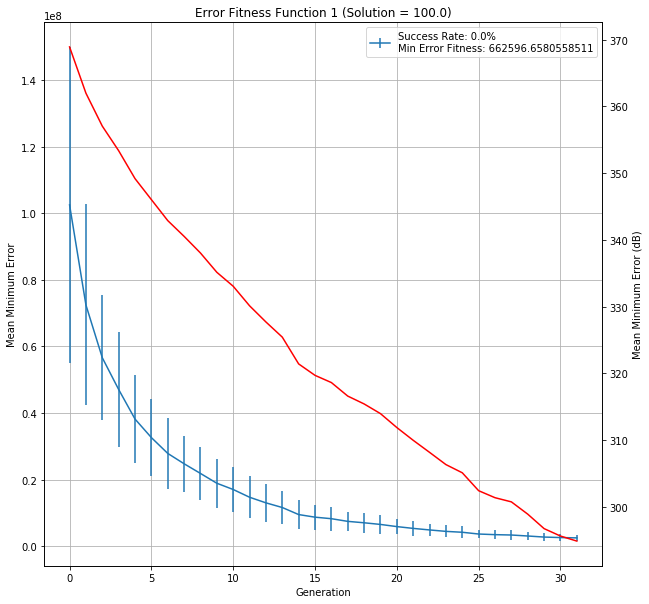

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.1,1.882817e+06,3.092010e+06,1.675623e+06,2.747928e+06,2.353963e+06,1.178123e+06,...,1.410328e+06,1.537569e+06,2.293733e+06,2.849034e+06,2.942011e+06,1.869454e+06,4.272100e+06,2.525938e+06,0:27:03,10200
